# Guía 4
## EMV
### Ejercicio 1
Este ejercicio es sencillo. Si $p$ sólo puede tener dos valores, basta evaluar la verosimilitud en ambos puntos y me quedo con el máximo. En este caso:
$$L(p) = p^{x} (1-p)^{10-x},\ p\in \{2/5, 4/5\}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
x = 3
L_p1 = (2/5)**3*(3/5)**7
L_p2 = (4/5)**3*(1/5)**7
print('p_{mv}=',[2/5,4/5][np.argmax([L_p1,L_p2])])

p_{mv}= 0.4


### Ejercicio 2
$f_{\underline{X}}(\underline{x}) = \frac{1}{(2\pi)^{n/2}\sigma^{2n}}e^{-0.5\prod_{i=1}^n \frac{(x_i-\mu)^2}{\sigma^2}} 
= \underbrace{\frac{1}{(2\pi)^{n/2}\sigma^{2n}}  e^{-\frac{\sum_{i=1}^n x_i^2}{2\sigma^2} + \frac{\sum_{i=1}^nx_i\mu}{\sigma^2} - \frac{n\mu^2}{2\sigma^2}}}_{g(r(\underline{x}),\ \theta=[\mu,\sigma^2]} \underbrace{1}_{h(\underline{x}}$.

Se observa que $r(\underline{X}) = \left[\sum_{i=1}^n X_i, \sum_{i=1}^n X_i^2\right]$ es un estadísico suficiente para $\theta = [\mu, \sigma^2]$.

Para hallar el MLE:
$$L(\mu,\sigma) = \frac{1}{(2\pi)^{n/2}\sigma^{n}}  e^{-\frac{\sum_{i=1}^n x_i^2}{2\sigma^2} + \frac{\sum_{i=1}^nx_i\mu}{\sigma^2} - \frac{n\mu^2}{2\sigma^2}}$$
Como cumple con las condiciones de regularidad (soporte no depende de los parámetros, es derivable respecto de $\mu,\ \sigma$, y además $\mu \in \mathbb{R},\ \sigma>0$ son conjuntos abiertos) puedo tomar el logaritmo, derivar e igualar a cer.

$$\frac{\partial L(\mu,\sigma)}{\partial \mu} = -\frac{n\mu}{\sigma^2} + \frac{\sum{x_i}}{\sigma^2} = 0 \Rightarrow \mu = \frac{1}{n}\sum_{i=1}^n x_i = \bar{x} \Rightarrow \hat{\mu} = \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$$

$$\frac{\partial L(\mu,\sigma)}{\partial \sigma^2} = -\frac{n}{\sigma}+ \frac{\sum(x_i-\mu)^2}{\sigma^3} = -n + \frac{\sum(x_i-\mu)^2}{\sigma^3} = 0 \quad\Rightarrow\quad \sigma^2 = \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2 \quad \Rightarrow \quad \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2$$

In [3]:
n = [10,100,1000,10000]
mu = 5
sigma = 3
muhat= np.zeros(len(n))
sigmahat= np.zeros(len(n))
for k, nn in enumerate(n):
    x = np.random.normal(mu, sigma, nn)
    muhat[k] = x.mean()
    sigmahat[k] = ((x-muhat[k])**2).mean()
print(muhat)
print(sigmahat)

[5.06429347 5.33618284 4.96534551 5.01072064]
[ 6.74432583 10.50042621  9.12074544  9.05411229]


## Estimación de densidades


<AxesSubplot:xlabel='density', ylabel='Density'>

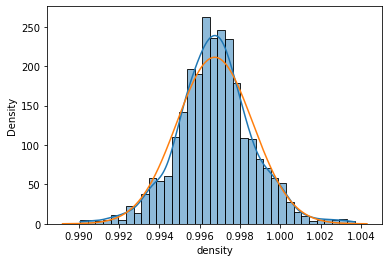

In [4]:
import pandas as pd
data = pd.read_csv('winequality-red.csv')
x = data.density
# puntos 1 y 2
sns.histplot(x,kde=True,stat='density')
#superpongo una normal 
sns.lineplot(x=np.linspace(x.mean()-4*x.std(),x.mean()+4*x.std(),1000), 
             y=stats.norm.pdf(np.linspace(x.mean()-4*x.std(),x.mean()+4*x.std(),1000), x.mean(), x.std()), color='C1')

<AxesSubplot:ylabel='Density'>

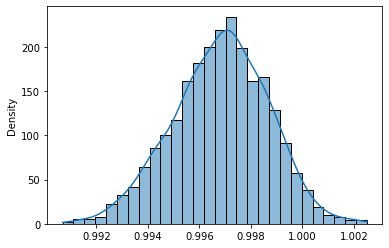

In [5]:
y = np.random.normal(x.mean(), x.std(), size=1600)
sns.histplot(y,kde=True, stat='density')